In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn.apionly as sns
import theano.tensor as tt

from sklearn import preprocessing

%matplotlib inline
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

In [5]:
import sys, os
sys.path.append(os.getcwd().split('notebooks')[0])
import utils

/Users/paul.pop/miniconda3/envs/KS3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [6]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [7]:
IMC_basedir = os.getcwd().split('code')[0]
DATA_AMELIA_FILE = os.path.join(IMC_basedir, 'data/imputed_dataset_no_censoring_26022018_Amelia1.csv')
DATA_MICE_FILE = os.path.join(IMC_basedir, 'data/imputed_dataset_no_censoring_26022018_MICE.csv')
TRAIN_FILE = os.path.join(IMC_basedir, 'data/amelia_train')
TEST_FILE = os.path.join(IMC_basedir, 'data/amelia_test')
MODEL_DIR = os.path.join(IMC_basedir, 'data/amelia_model')

In [24]:
df, labels = utils.process_amelia(DATA_AMELIA_FILE)
X_train, Y_train, X_test, Y_test = utils.get_train_test_data(df, regression=False, train_size=0.8)
X_train_r, Y_train_r, X_test_r, Y_test_r = utils.get_train_test_data(df, regression=True, train_size=0.8)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

In [29]:
# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = X_train.shape

# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)

# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 1)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

In [48]:
# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X_train_r, Y_train_r)

ols = LinearRegression()
ols.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
Y_pred = clf.predict(X_test_r)

In [55]:
print("Mean square error (MSE): %.2f"
      % np.mean((Y_pred - Y_test_r) ** 2))      # The mean square error

Mean square error (MSE): 1057049.43


In [56]:
res = Y_pred - Y_test_r

In [67]:
res.describe()

count     418.000000
mean       22.888969
std      1029.106002
min     -6690.322723
25%      -281.543297
50%       129.069472
75%       545.304837
max      2455.998088
Name: life_expectancy, dtype: float64

In [ ]:
res.

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  1.,  3.,
         2.,  1.,  4.,  1.,  3.,  4.,  3.,  3.,  1.,  6.,  5.,  4.,  9.,
        12., 10., 12., 16., 21., 10., 17., 20., 20.]),
 array([-6690.32272284, -6622.13065142, -6553.93858   , -6485.74650859,
        -6417.55443717, -6349.36236575, -6281.17029434, -6212.97822292,
        -6144.7861515 , -6076.59408009, -6008.40200867, -5940.20993725,
        -5872.01786584, -5803.82579442, -5735.633723  , -5667.44165159,
        -5599.24958017, -5531.05750875, -5462.86543734, -5394.67336592,
        -5326.4812945 , -5258.28922309, -5190.09715167, -5121.90508025,
  

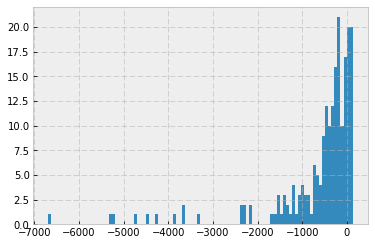

In [62]:
plt.hist(res[res < res.quantile(0.5)], bins=100)

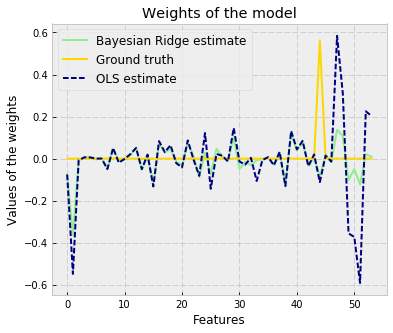

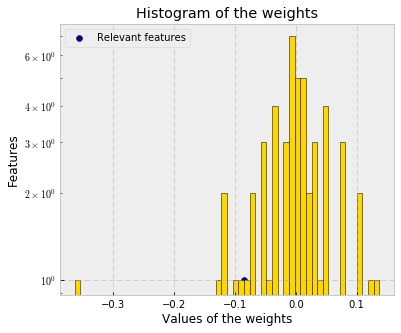

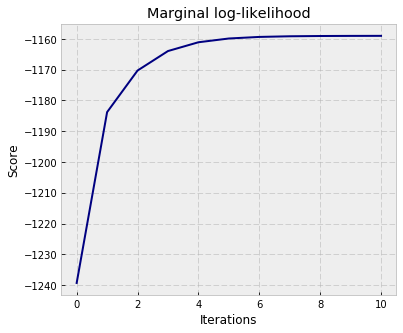

In [32]:
# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.ones(len(relevant_features)),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

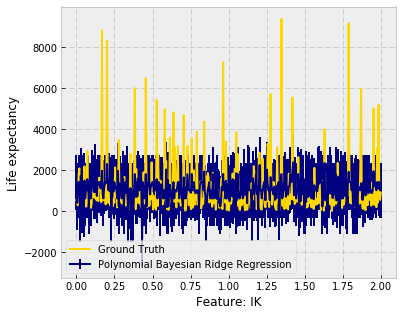

In [89]:
column = 'IK'

X = np.array(X_train_r[column]).reshape(1668, 1)
X_te = np.array(X_test_r[column]).reshape(418, 1)
Y = Y_train_r

# Plotting some predictions for polynomial regression
clf_poly = BayesianRidge()
clf_poly.fit(X, Y)

X_plot = np.linspace(0, Y_test.max(), len(Y_test))
y_plot = Y_test_r
y_mean, y_std = clf_poly.predict(X_te, return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Life expectancy")
plt.xlabel('Feature: ' + column)
plt.legend(loc="lower left")
plt.show()

418

In [77]:
clf_poly.predict(X_test)

NotFittedError: This BayesianRidge instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [70]:
X_train_r.columns

Index(['Gender', 'Tumor_grade', 'Age_surgery', 'IDH_TERT', 'IK', 'TERT_mutant',
       'TERT_wt', 'Gene_P16_DELETE', 'Gene_P16_NORMAL', 'Gene_Ch9P_GAIN',
       'Gene_Ch9P_NON PERTE', 'Gene_Ch9P_PERTE', 'Gene_Mgmt_METHYLE',
       'Gene_Mgmt_NON METHYLE', 'Surgery_type_aucune', 'Surgery_type_biopsie',
       'Surgery_type_exérèse', 'Surgery_type_partielle', 'Gene_P53_ALTERE',
       'Gene_P53_NC', 'Gene_P53_NORMAL', 'IDH_NC', 'IDH_mutant', 'IDH_wt',
       'Gene_Ihc_Atrx_Extinction diffuse', 'Gene_Ihc_Atrx_Maintien',
       'Gene_Ihc_Atrx_extinction', 'Gene_Mdm2_AMPLIFIE', 'Gene_Mdm2_NORMAL',
       'Tumor_Location_A', 'Tumor_Location_B', 'Tumor_Location_C',
       'Tumor_Location_N', 'Tumor_Location_autre', 'Gene_Ch10Q_NON PERTE',
       'Gene_Ch10Q_PERTE', 'Gene_Egfr_AMPLIFIE', 'Gene_Egfr_NORMAL',
       'X1p19q_codel_0', 'X1p19q_codel_1', 'Tumor_Position_D',
       'Tumor_Position_G', 'Tumor_Position_bilatéral', 'Tumor_Position_médian',
       'Tumor_Position_non précisé', 'Gene_Cdk